# Case Study - Sunlight in Austin
Working with real-world weather and climate data, in this chapter you will bring together and apply all of the skills you have acquired in this course. You will use Pandas to manipulate the data into a form usable for analysis, and then systematically explore it using the techniques you learned in the prior chapters. Enjoy!

# 1. Reading and cleaning the data
## 1.1 Reading in a data file
Now that you have identified the method to use to read the data, let's try to read one file. The problem with real data such as this is that the files are almost never formatted in a convenient way. In this exercise, there are several problems to overcome in reading the file. First, there is no header, and thus the columns don't have labels. There is also no obvious index column, since none of the data columns contain a full date or time.

Your job is to read the file into a DataFrame using the default arguments. After inspecting it, you will re-read the file specifying that there are no headers supplied.

The CSV file has been provided for you as the variable `data_file`.

### Instructions:
* Import `pandas` as `pd`.
* Read the file `data_file` into a DataFrame called `df`.
* Print the output of `df.head()`. This has been done for you. Notice the formatting problems in `df`.
* Re-read the data using specifying the keyword argument `header=None` and assign it to `df_headers`.
* Print the output of `df_headers.head()`. This has already been done for you. Hit 'Submit Answer' and see how this resolves the formatting issues.

In [1]:
# Import pandas
import pandas as pd
# Read in the data file: df
data_file = '_datasets/NOAA_QCLCD_2011_hourly_13904.txt'
df = pd.read_csv(data_file)

# Print the output of df.head()
print(df.head())

   13904  20110101  0053  12  OVC045     10.00  .1  .2  .3 ...   .18  .19  \
0  13904  20110101   153  12  OVC049     10.00             ...              
1  13904  20110101   253  12  OVC060     10.00             ...   030        
2  13904  20110101   353  12  OVC065     10.00             ...              
3  13904  20110101   453  12  BKN070     10.00             ...              
4  13904  20110101   553  12  BKN065     10.00             ...   015        

   29.95  .20  AA  .21  .22  .23 29.95.1  .24  
0  30.01       AA                  30.02       
1  30.01       AA                  30.02       
2  30.03       AA                  30.04       
3  30.04       AA                  30.04       
4  30.06       AA                  30.06       

[5 rows x 44 columns]


In [2]:
# Read in the data file with header=None: df_headers
df_headers = pd.read_csv(data_file, header=None)

# Print the output of df_headers.head()
print(df_headers.head())

      0         1    2   3       4  5      6  7  8  9  ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00          ...          29.95      
1  13904  20110101  153  12  OVC049     10.00          ...          30.01      
2  13904  20110101  253  12  OVC060     10.00          ...  030     30.01      
3  13904  20110101  353  12  OVC065     10.00          ...          30.03      
4  13904  20110101  453  12  BKN070     10.00          ...          30.04      

   38 39 40 41     42 43  
0  AA           29.95     
1  AA           30.02     
2  AA           30.02     
3  AA           30.04     
4  AA           30.04     

[5 rows x 44 columns]


Note how the column names are not informative. You'll fix this in the next exercise!

## 1.2 Re-assigning column names
After the initial step of reading in the data, the next step is to clean and tidy it so that it is easier to work with.

In this exercise, you will begin this cleaning process by re-assigning column names and dropping unnecessary columns.

pandas has been imported in the workspace as `pd`, and the file `NOAA_QCLCD_2011_hourly_13904.txt` has been parsed and loaded into a DataFrame `df`. The comma separated string of column names, `column_labels`, and list of columns to drop, `list_to_drop`, have also been loaded for you.

### Instructions:
* Convert the comma separated string `column_labels` to a list of strings using `.split(',')`. Assign the result to `column_labels_list`.
* Reassign `df.columns` using the list of strings `column_labels_list`.
* Call `df.drop()` with `list_to_drop` and `axis='columns'`. Assign the result to `df_dropped`.
* Print `df_dropped.head()` to examine the result. This has already been done for you.

In [3]:
# Read in the data file: df
df = pd.read_csv('_datasets/NOAA_QCLCD_2011_hourly_13904.txt', header=None)

column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag',
                'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag',
                'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag',
                'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag',
                'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag',
                'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type',
                'altimeterFlag', 'junk']

In [4]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis='columns')

# Print the output of df_dropped.head()
print(df_dropped.head())

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101    53           12        OVC045      10.00             51   
1  13904  20110101   153           12        OVC049      10.00             51   
2  13904  20110101   253           12        OVC060      10.00             51   
3  13904  20110101   353           12        OVC065      10.00             50   
4  13904  20110101   453           12        BKN070      10.00             50   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             38          3.1              15          -9.4   
1         10.6             37          3.0              14         -10.0   
2         10.6             37          2.9              13         -10.6   
3         10.0             38          3.1              17          -8.3   
4         10.0             37          2.8              15          -9.4   

  relative_humidity wind_speed wind_direction station_pr

Now that you have informative column names, it is a lot easier to interpret the data! But there is still some tidying work to be done: You'll clean the datetime data in the next exercise.

## 1.3 Cleaning and tidying datetime data
In order to use the full power of pandas time series, you must construct a `DatetimeIndex`. To do so, it is necessary to clean and transform the date and time columns.

The DataFrame `df_dropped` you created in the last exercise is provided for you and pandas has been imported as `pd`.

Your job is to clean up the `date` and `Time` columns and combine them into a datetime collection to be used as the Index.

### Instructions:
* Convert the `'date'` column to a string with `.astype(str)` and assign to `df_dropped['date']`.
* Add leading zeros to the `'Time'` column. This has been done for you.
* Concatenate the new `'date'` and `'Time'` columns together. Assign to `date_string`.
* Convert the `date_string` Series to datetime values with `pd.to_datetime()`. Specify the `format` parameter.
* Set the index of the `df_dropped` DataFrame to be `date_times`. Assign the result to `df_clean`.

In [5]:
print(df_dropped.head())

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101    53           12        OVC045      10.00             51   
1  13904  20110101   153           12        OVC049      10.00             51   
2  13904  20110101   253           12        OVC060      10.00             51   
3  13904  20110101   353           12        OVC065      10.00             50   
4  13904  20110101   453           12        BKN070      10.00             50   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             38          3.1              15          -9.4   
1         10.6             37          3.0              14         -10.0   
2         10.6             37          2.9              13         -10.6   
3         10.0             38          3.1              17          -8.3   
4         10.0             37          2.8              15          -9.4   

  relative_humidity wind_speed wind_direction station_pr

In [6]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date']+df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

All that's left now is to clean the numeric columns.

## 1.4 Cleaning the numeric columns
The numeric columns contain missing values labeled as `'M'`. In this exercise, your job is to transform these columns such that they contain only numeric values and interpret missing data as `NaN`.

The pandas function `pd.to_numeric()` is ideal for this purpose: It converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument `errors='coerce'`, you can force strings like `'M'` to be interpreted as `NaN`.

A DataFrame `df_clean` is provided for you at the start of the exercise, and as usual, pandas has been imported as `pd`.

### Instructions:
* Print the `'dry_bulb_faren'` temperature between 8 AM and 9 AM on June 20, 2011.
* Convert the `'dry_bulb_faren'` column to numeric values with `pd.to_numeric()`. Specify `errors='coerce'`.
* Print the transformed `dry_bulb_faren` temperature between 8 AM and 9 AM on June 20, 2011.
* Convert the `'wind_speed'` and `'dew_point_faren'` columns to numeric values with `pd.to_numeric()`. Again, specify `errors='coerce'`.

In [7]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00':'2011-06-20 09:00', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object


In [8]:
# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00':'2011-06-20 09:00', 'dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


# 2. Statistical exploratory data analysis
## 2.1 Signal min, max, median
Now that you have the data read and cleaned, you can begin with statistical EDA. First, you will analyze the 2011 Austin weather data.

Your job in this exercise is to analyze the `'dry_bulb_faren'` column and print the median temperatures for specific time ranges. You can do this using partial datetime string selection.

The cleaned dataframe is provided in the workspace as `df_clean`.

### Instructions:
* Select the `'dry_bulb_faren'` column and print the output of `.median()`.
* Use `.loc[]` to select the range `'2011-Apr':'2011-Jun'` from `'dry_bulb_faren'` and print the output of `.median()`.
* Use `.loc[]` to select the month `'2011-Jan'` from `'dry_bulb_faren'` and print the output of `.median()`.

In [9]:
# Print the median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


## 2.2 Signal variance
You're now ready to compare the 2011 weather data with the 30-year normals reported in 2010. You can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

The DataFrames df_clean and df_climate from previous exercises are available in the workspace.

Your job is to first resample `df_clean` and `df_climate` by day and aggregate the mean temperatures. You will then extract the temperature related columns from each - `'dry_bulb_faren'` in `df_clean`, and `'Temperature'` in `df_climate` - as NumPy arrays and compute the difference.

Notice that the indexes of `df_clean` and `df_climate` are not aligned - `df_clean` has dates in 2011, while `df_climate` has dates in 2010. This is why you extract the temperature columns as NumPy arrays. An alternative approach is to use the pandas `.reset_index()` method to make sure the Series align properly. You will practice this approach as well.

### Instructions:
* Downsample `df_clean` with _daily_ frequency and aggregate by the mean. Store the result as `daily_mean_2011`.
* Extract the `'dry_bulb_faren'` column from `daily_mean_2011` as a NumPy array using `.values`. Store the result as `daily_temp_2011`. Note: `.values` is an attribute, not a method, so you don't have to use `()`.
* Downsample `df_climate` with _daily_ frequency and aggregate by the mean. Store the result as `daily_climate`.
* Extract the `'Temperature'` column from `daily_climate` using the `.reset_index()` method. To do this, first reset the index of `daily_climate`, and then use bracket slicing to access `'Temperature'`. Store the result as `daily_temp_climate`.

In [10]:
# Load second dataframe
df_climate = pd.read_csv('_datasets/weather_data_austin_2010.csv', index_col='Date',
                         usecols=['Date', 'Temperature', 'DewPoint', 'Pressure'], 
                        parse_dates=True)

In [11]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean['dry_bulb_faren'].resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011.values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate['Temperature'].resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056477


## 2.3 Sunny or cloudy
On average, how much hotter is it when the sun is shining? In this exercise, you will compare temperatures on sunny days against temperatures on overcast days.

Your job is to use Boolean selection to filter out sunny and overcast days, and then compute the difference of the mean daily maximum temperatures between each type of day.

The DataFrame `df_clean` from previous exercises has been provided for you. The column `'sky_condition'` provides information about whether the day was sunny (`'CLR'`) or overcast (`'OVC'`).

### Instructions 1/3:
* Get the cases in `df_clean` where the sky is clear. That is, when `'sky_condition'` equals `'CLR'`, assigning to `is_sky_clear`.
* Use `.loc[]` to filter `df_clean` by `is_sky_clear`, assigning to `sunny`.
* Resample `sunny` by day (`'D'`), and take the max to find the maximum daily temperature.

In [12]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean.loc[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

# See the result
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


### Instructions 2/3:
* Get the cases in `df_clean` where the sky is overcast. Using `.str.contains()`, find when `'sky_condition'` contains `'OVC'`, assigning to `is_sky_overcast`.
* Use `.loc[]` to filter `df_clean` by `is_sky_overcast`, assigning to `overcast`.
* Resample `overcast` by day (`'D'`), and take the max to find the maximum daily temperature.

In [13]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df_clean.loc[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast.resample('D').max()

# See the result
overcast_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,0353,12.0,OVC065,51.0,10.6,38,3.1,17.0,-9.4,27,15.0,360,29.51,30.03
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,13904.0,20110103,2353,12.0,SCT042 OVC055,58.0,9.4,49,9.7,45.0,7.0,79,10.0,200,29.70,M
2011-01-04,13904.0,20110104,2353,12.0,SCT010 OVC016,57.0,8.9,56,9.4,56.0,8.9,100,8.0,VR,29.59,M
2011-01-05,13904.0,20110105,0653,12.0,SCT006 OVC011,57.0,14.0,56,13.5,56.0,13.3,96,3.0,250,29.48,M


### Instructions 3/3:
* Calculate the mean of `sunny_daily_max`, assigning to `sunny_daily_max_mean`.
* Calculate the mean of `overcast_daily_max`, assigning to `overcast_daily_max_mean`.
* Print `sunny_daily_max_mean` minus `overcast_daily_max_mean`. _How much hotter are sunny days?_

In [14]:
# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean - overcast_daily_max_mean)

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


The average daily maximum dry bulb temperature was 6.5 degrees Fahrenheit higher on sunny days compared to overcast days.

In [15]:
df_clean.visibility = pd.to_numeric(df_clean['visibility'], errors='coerce')

# 3. Visual exploratory data analysis
## 3.1 Weekly average temperature and visibility
Is there a correlation between temperature and visibility? Let's find out.

In this exercise, your job is to plot the weekly average temperature and visibility as subplots. To do this, you need to first select the appropriate columns and then resample by week, aggregating the mean.

In addition to creating the subplots, you will compute the Pearson correlation coefficient using `.corr()`. The Pearson correlation coefficient, known also as Pearson's r, ranges from -1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation). A value close to 1 here would indicate that there is a strong correlation between temperature and visibility.

### Instructions:
* Import `matplotlib.pyplot` as `plt`.
* Select the `'visibility'` and `'dry_bulb_faren'` columns and resample them by week, aggregating the mean. Assign the result to `weekly_mean`.
* Print the output of `weekly_mean.corr()`.
* Plot the `weekly_mean` dataframe with `.plot()`, specifying `subplots=True`.

                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000


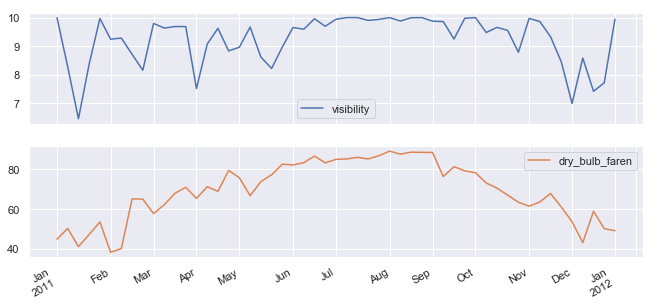

In [16]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Specify plot size
plt.rcParams['figure.figsize'] = [11, 5]

df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

## 3.2 Daily hours of clear sky
In a previous exercise, you analyzed the `'sky_condition'` column to explore the difference in temperature on sunny days compared to overcast days. Recall that a `'sky_condition'` of `'CLR'` represents a sunny day. In this exercise, you will explore sunny days in greater detail. Specifically, you will use a box plot to visualize the fraction of days that are sunny.

The `'sky_condition'` column is recorded hourly. Your job is to resample this column appropriately such that you can extract the number of sunny hours in a day and the number of total hours. Then, you can divide the number of sunny hours by the number of total hours, and generate a box plot of the resulting fraction.

As before, `df_clean` is available for you in the workspace.

### Instructions 1/3:
* Get the cases in `df_clean` where the sky is clear. That is, when `'sky_condition'` equals `'CLR'`, assigning to `is_sky_clear`.
* Resample `is_sky_clear` by day, assigning to `resampled`.

In [17]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
resampled

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### Instructions 2/3:
* Calculate the number of measured sunny hours per day as the sum of `resampled`, assigning to `sunny_hours`.
* Calculate the total number of measured hours per day as the count of `resampled`, assigning to `total_hours`.
* Calculate the fraction of hours per day that were sunny as the ratio of sunny hours to total hours.

In [18]:
# From previous step
is_sky_clear = df_clean['sky_condition'] == 'CLR'
resampled = is_sky_clear.resample('D')

# Calculate the number of sunny hours per day
sunny_hours = resampled.sum()

# Calculate the number of measured hours per day
total_hours = df_clean['sky_condition'].resample('D').count()

# Calculate the fraction of hours per day that were sunny
sunny_fraction = sunny_hours/total_hours

### Instructions 3/3:
* Draw a box plot of sunny_fraction using .plot() with kind set to `'box'``.

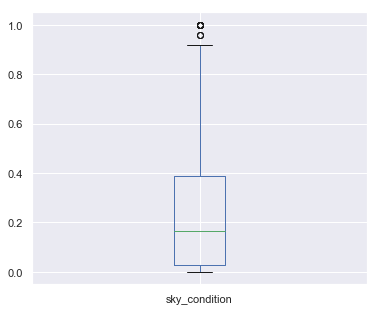

In [19]:
# Specify plot size
plt.rcParams['figure.figsize'] = [6, 5]

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

The outlook for your Pandas skills is sunny! By contrast, the weather in the dataset is typically sunny less than 40% of the time.

## 3.3 Heat or humidity
Dew point is a measure of relative humidity based on pressure and temperature. A dew point above 65 is considered uncomfortable while a temperature above 90 is also considered uncomfortable.

In this exercise, you will explore the maximum temperature and dew point of each month. The columns of interest are `'dew_point_faren'` and `'dry_bulb_faren'`. After resampling them appropriately to get the maximum temperature and dew point in each month, generate a histogram of these values as subplots. Uncomfortably, you will notice that the maximum dew point is above 65 every month!

### Instructions:
* Select the `'dew_point_faren'` and `'dry_bulb_faren'` columns (in that order). Resample by month and aggregate the maximum monthly temperatures. Assign the result to `monthly_max`.
* Plot a histogram of the resampled data with `bins=8`, `alpha=0.5`, and `subplots=True`.

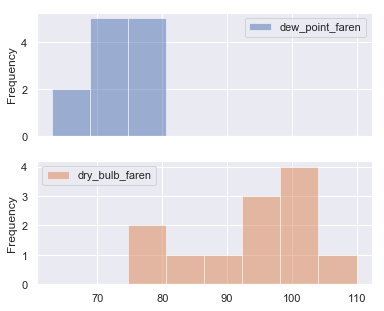

In [20]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

## 3.4 Probability of high temperatures
We already know that 2011 was hotter than the climate normals for the previous thirty years. In this final exercise, you will compare the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, you will use a CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value. To do this, you will leverage the data manipulation, filtering, resampling, and visualization skills you have acquired throughout this course.

The two DataFrames `df_clean` and `df_climate` are available in the workspace. Your job is to select the maximum temperature in August in `df_climate`, and then maximum daily temperatures in August 2011. You will then filter out the days in August 2011 that were above the August 2010 maximum, and use this to construct a CDF plot.

Once you've generated the CDF, notice how it shows that there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!

### Instructions:
* From `df_climate`, extract the maximum temperature observed in August 2010. The relevant column here is `'Temperature'`. You can select the rows corresponding to August 2010 in multiple ways. For example, `df_climate.loc['2011-Feb']` selects all rows corresponding to February 2011, while `df_climate.loc['2009-09', 'Pressure']` selects the rows corresponding to September 2009 from the `'Pressure'` column.
* From `df_clean`, select the August 2011 temperature data from the `'dry_bulb_faren'`. Resample this data by day and aggregate the maximum value. Store the result in `august_2011`.
* Filter rows of `august_2011` to keep days where the value exceeded `august_max`. Store the result in `august_2011_high`.
* Construct a CDF of `august_2011_high` using 25 bins. Remember to specify the `kind`, `normed`, and `cumulative` parameters in addition to `bins`.

95.3
2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
Freq: D, Name: dry_bulb_faren, dtype: float64


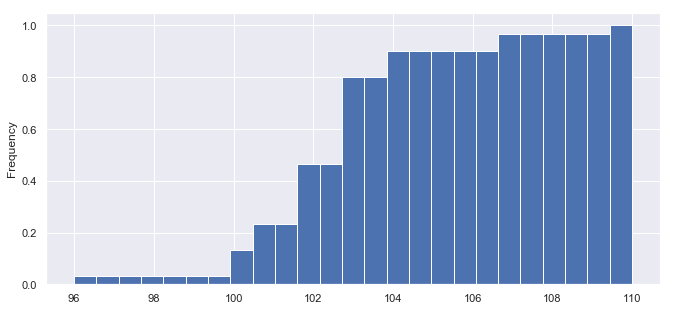

In [21]:
# Specify plot size
plt.rcParams['figure.figsize'] = [11, 5]

# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug', 'Temperature'].max()
print(august_max)

# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = df_clean.loc['2011-Aug', 'dry_bulb_faren'].resample('D').max()
print(august_2011.head())

# Filter for days in august_2011 where the value exceeds august_max: august_2011_high

august_2011_high = august_2011.loc[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', density=True, cumulative=True, bins=25)

# Display the plot
plt.show()